In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

In C:\Users\SANGMIN\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\SANGMIN\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\SANGMIN\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\SANGMIN\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\SANGMIN\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classi

In [3]:
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)
plt.style.use("fivethirtyeight")

In [4]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [5]:
df = pd.read_csv("seoul_covid19.csv")
df

,연번,환자,확진일,거주지,여행력,접촉력,조치상황,년월,년월일,월,주,년주
0,24267,78369,2021-01-31,타시도,-,감염경로 조사중,치료중,21-01,21-01-31,1,4,2021-4
1,24266,78472,2021-01-31,강남구,-,감염경로 조사중,치료중,21-01,21-01-31,1,4,2021-4
2,24265,78484,2021-01-31,강남구,-,성동구 소재 병원 관련('21.1월),치료중,21-01,21-01-31,1,4,2021-4
3,24264,78471,2021-01-31,강남구,-,성동구 소재 병원 관련('21.1월),치료중,21-01,21-01-31,1,4,2021-4
4,24263,78415,2021-01-31,타시도,-,타시도 확진자 접촉,치료중,21-01,21-01-31,1,4,2021-4
...,...,...,...,...,...,...,...,...,...,...,...,...
24262,5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,20-01,20-01-31,1,5,2020-5
24263,4,7,2020-01-30,마포구,중국,해외유입,퇴원,20-01,20-01-30,1,5,2020-5
24264,3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,20-01,20-01-30,1,5,2020-5
24265,2,5,2020-01-30,중랑구,중국,해외유입,퇴원,20-01,20-01-30,1,5,2020-5


In [6]:
day_count = df["확진일"].value_counts().head(10)
day_count

2020-12-17    588
2020-12-24    566
2020-12-28    525
2020-12-25    431
2020-12-16    427
2020-12-12    392
2020-12-29    387
2020-12-15    381
2020-12-18    381
2020-12-22    375
Name: 확진일, dtype: int64

In [7]:
year_month = df["년월"].value_counts().sort_index()
year_month

20-01        7
20-02       80
20-03      391
20-04      156
20-05      229
20-06      459
20-07      281
20-08     2415
20-09     1306
20-10      733
20-11     2904
20-12    10428
21-01     4878
Name: 년월, dtype: int64

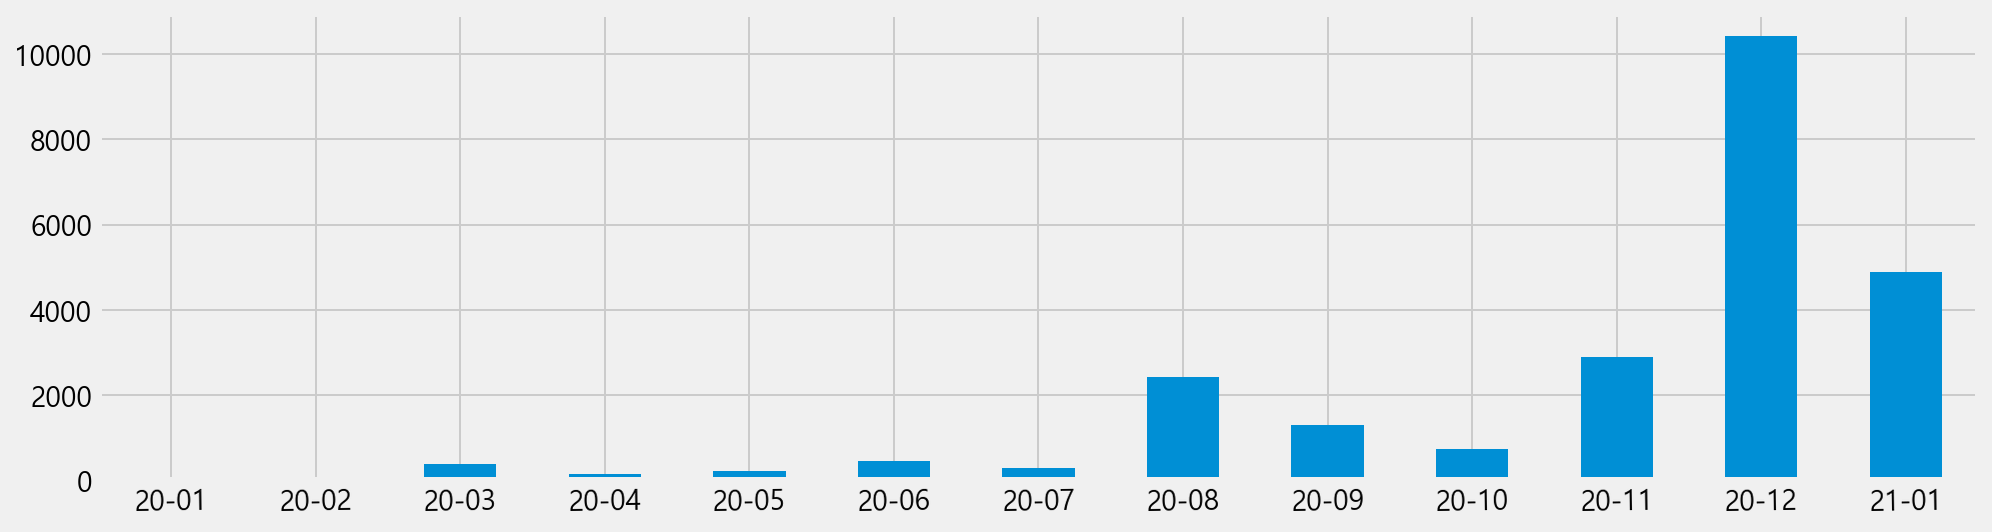

In [8]:
year_month_g = df["년월"].value_counts().sort_index().plot.bar(figsize=(15,4),rot=1)

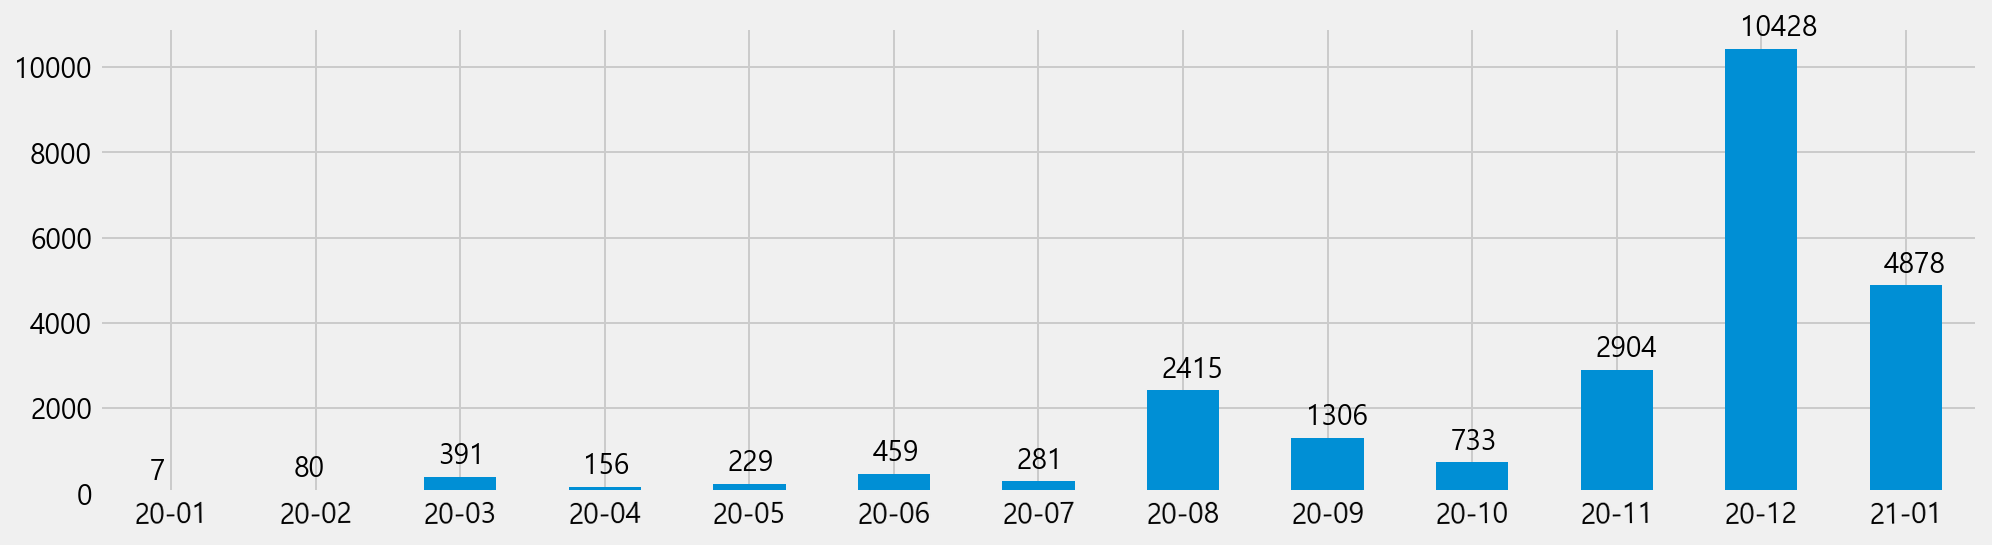

In [9]:
year_month_g = df["년월"].value_counts().sort_index().plot.bar(figsize=(15,4),rot=1)
for i in range (len(year_month)):
    count = year_month.iloc[i]
    year_month_g.text(x=i-0.15,y=count+300,s=count)

In [10]:
week_count = df.groupby(["년월", "주"])["연번"].count()
week_count

년월     주 
20-01  4        1
       5        6
20-02  5        1
       6        4
       7        2
             ... 
21-01  1     1456
       2     1002
       3      844
       4      807
       53     769
Name: 연번, Length: 65, dtype: int64

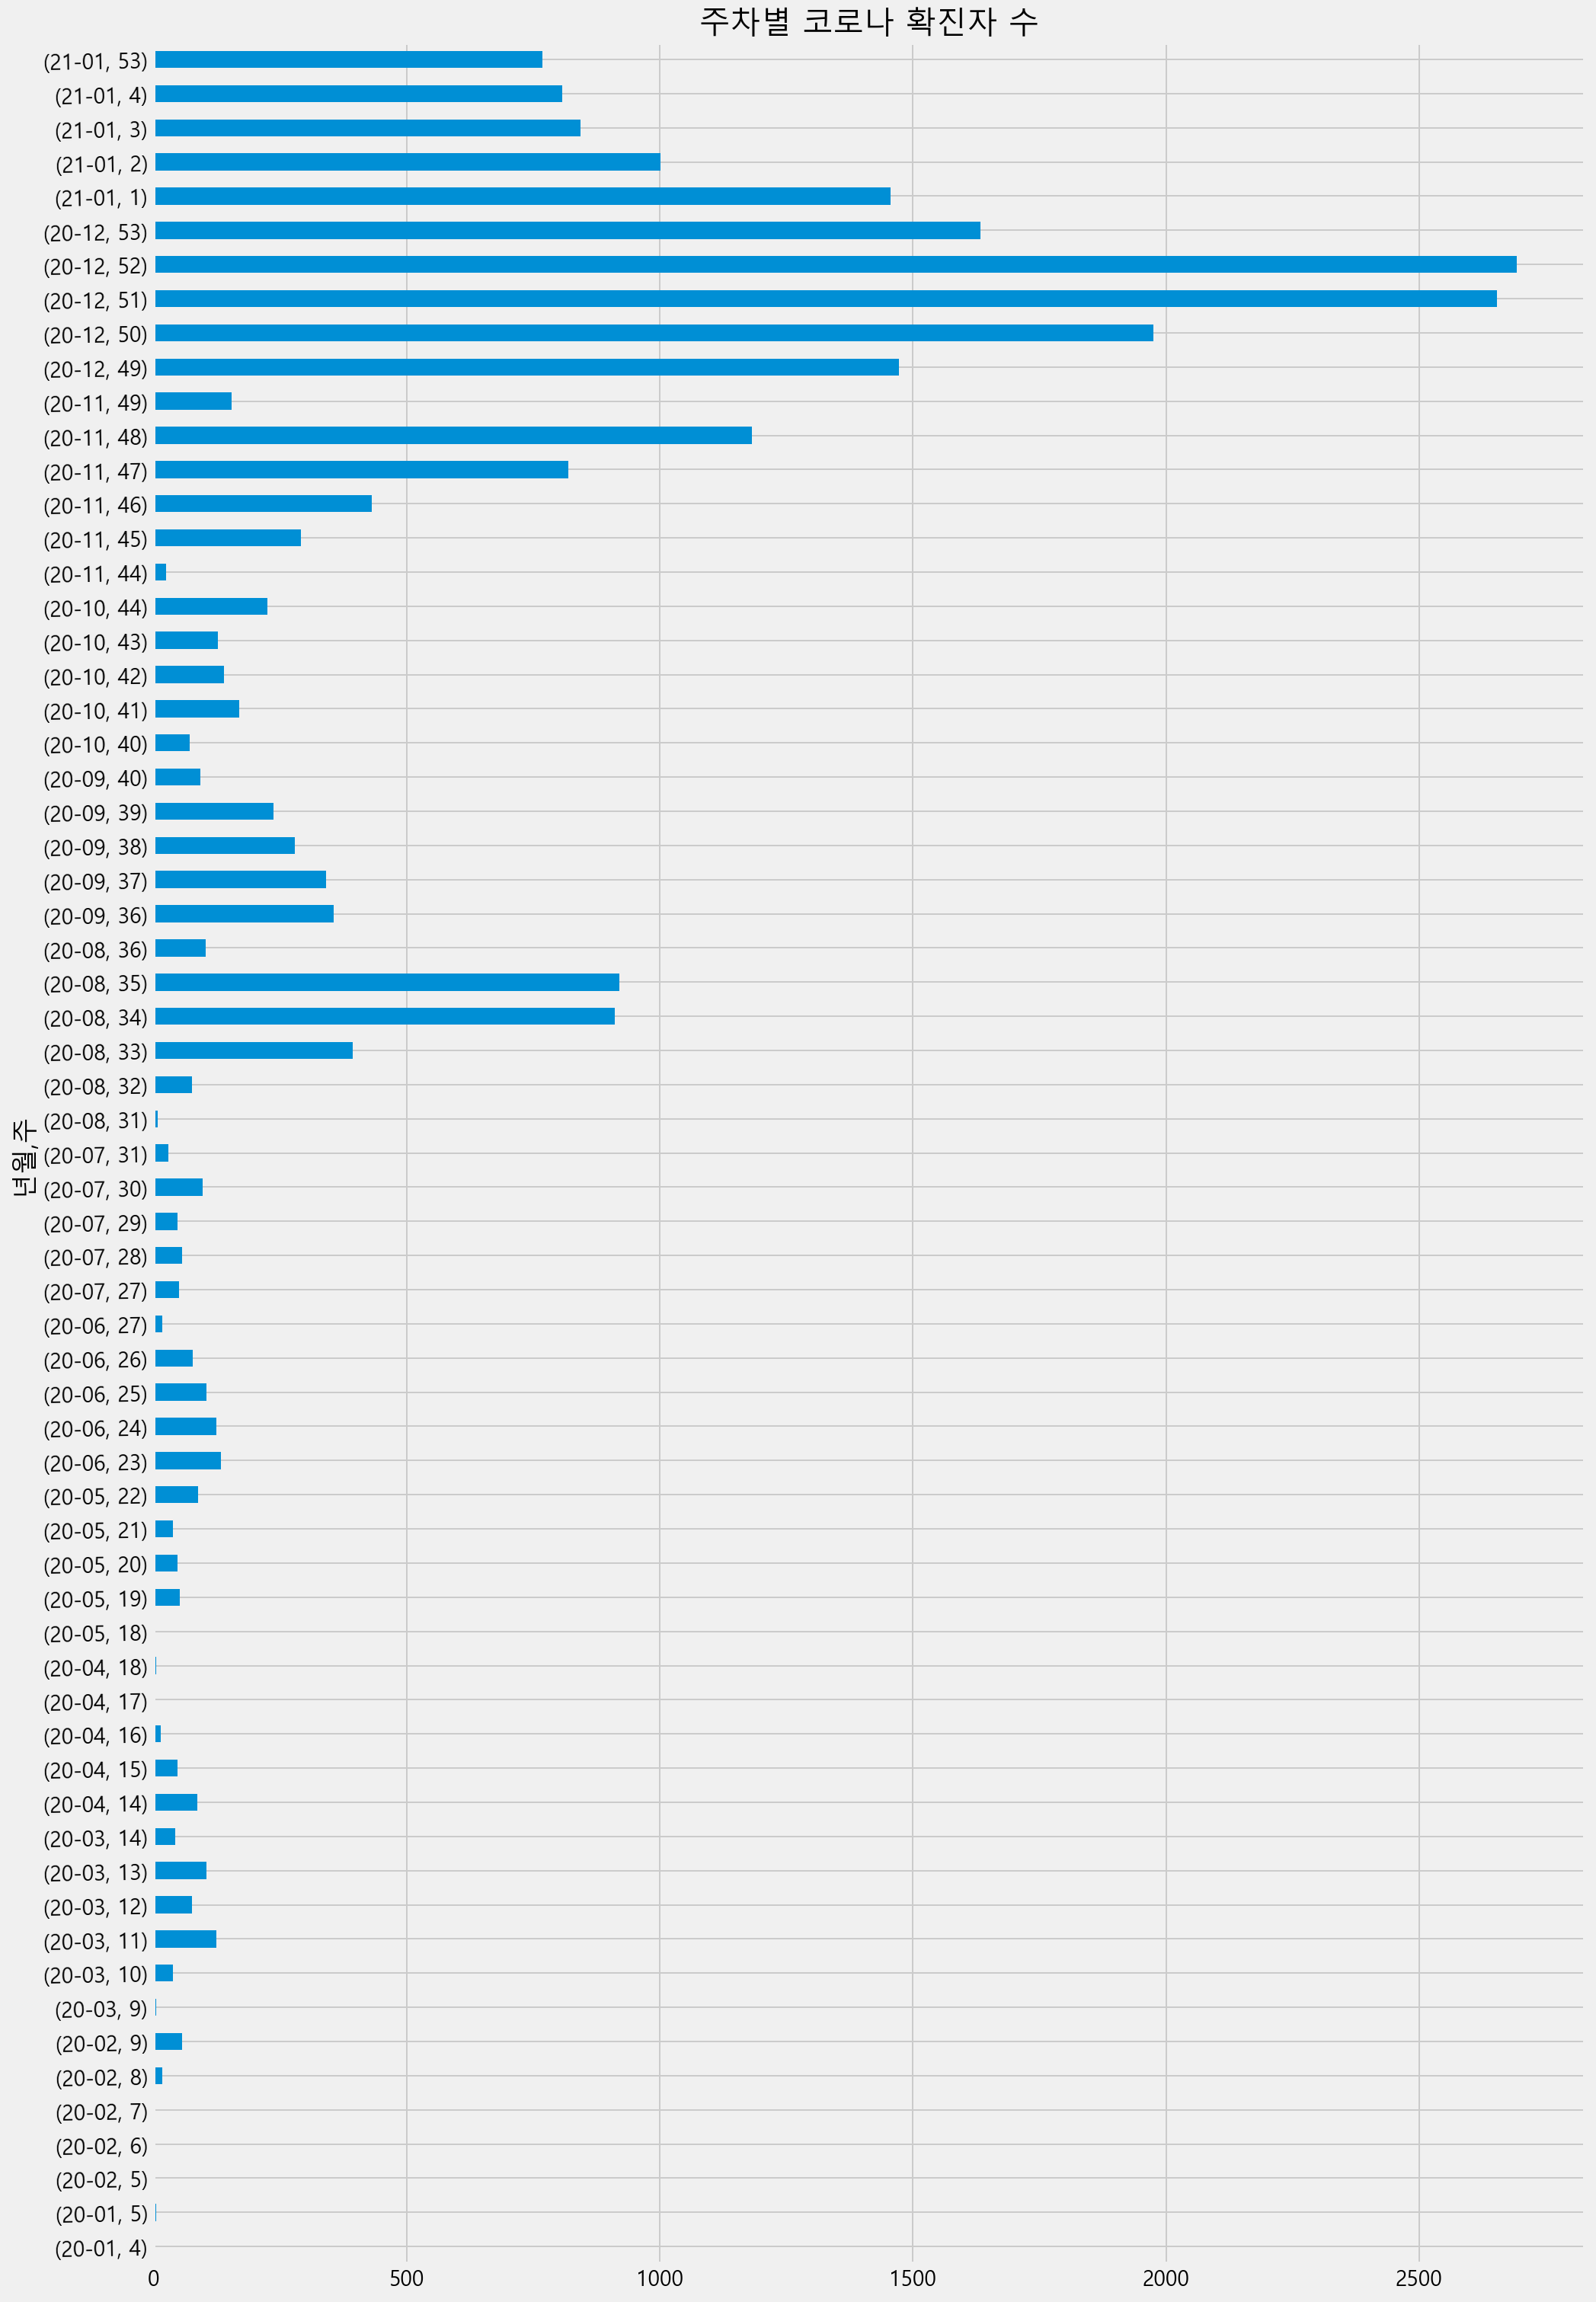

In [11]:
week_count_g = week_count.plot.barh(figsize=(15,25),rot=1,title="주차별 코로나 확진자 수")

In [12]:
import datetime

def GetWeekFirstDate(sourceDate):
    weekDayCount = sourceDate.weekday()
    targetDate = sourceDate - datetime.timedelta(days=weekDayCount);
    return targetDate

df['년주'] = df['확진일'].apply(lambda x : GetWeekFirstDate(datetime.datetime.strptime(x,'%Y-%m-%d')).strftime("%Y-%V"))

In [13]:
week_count = df.groupby(["년월", "년주"])["연번"].count()
week_count

년월     년주     
20-01  2020-04       1
       2020-05       6
20-02  2020-05       1
       2020-06       4
       2020-07       2
                  ... 
21-01  2020-53     769
       2021-01    1456
       2021-02    1002
       2021-03     844
       2021-04     807
Name: 연번, Length: 65, dtype: int64

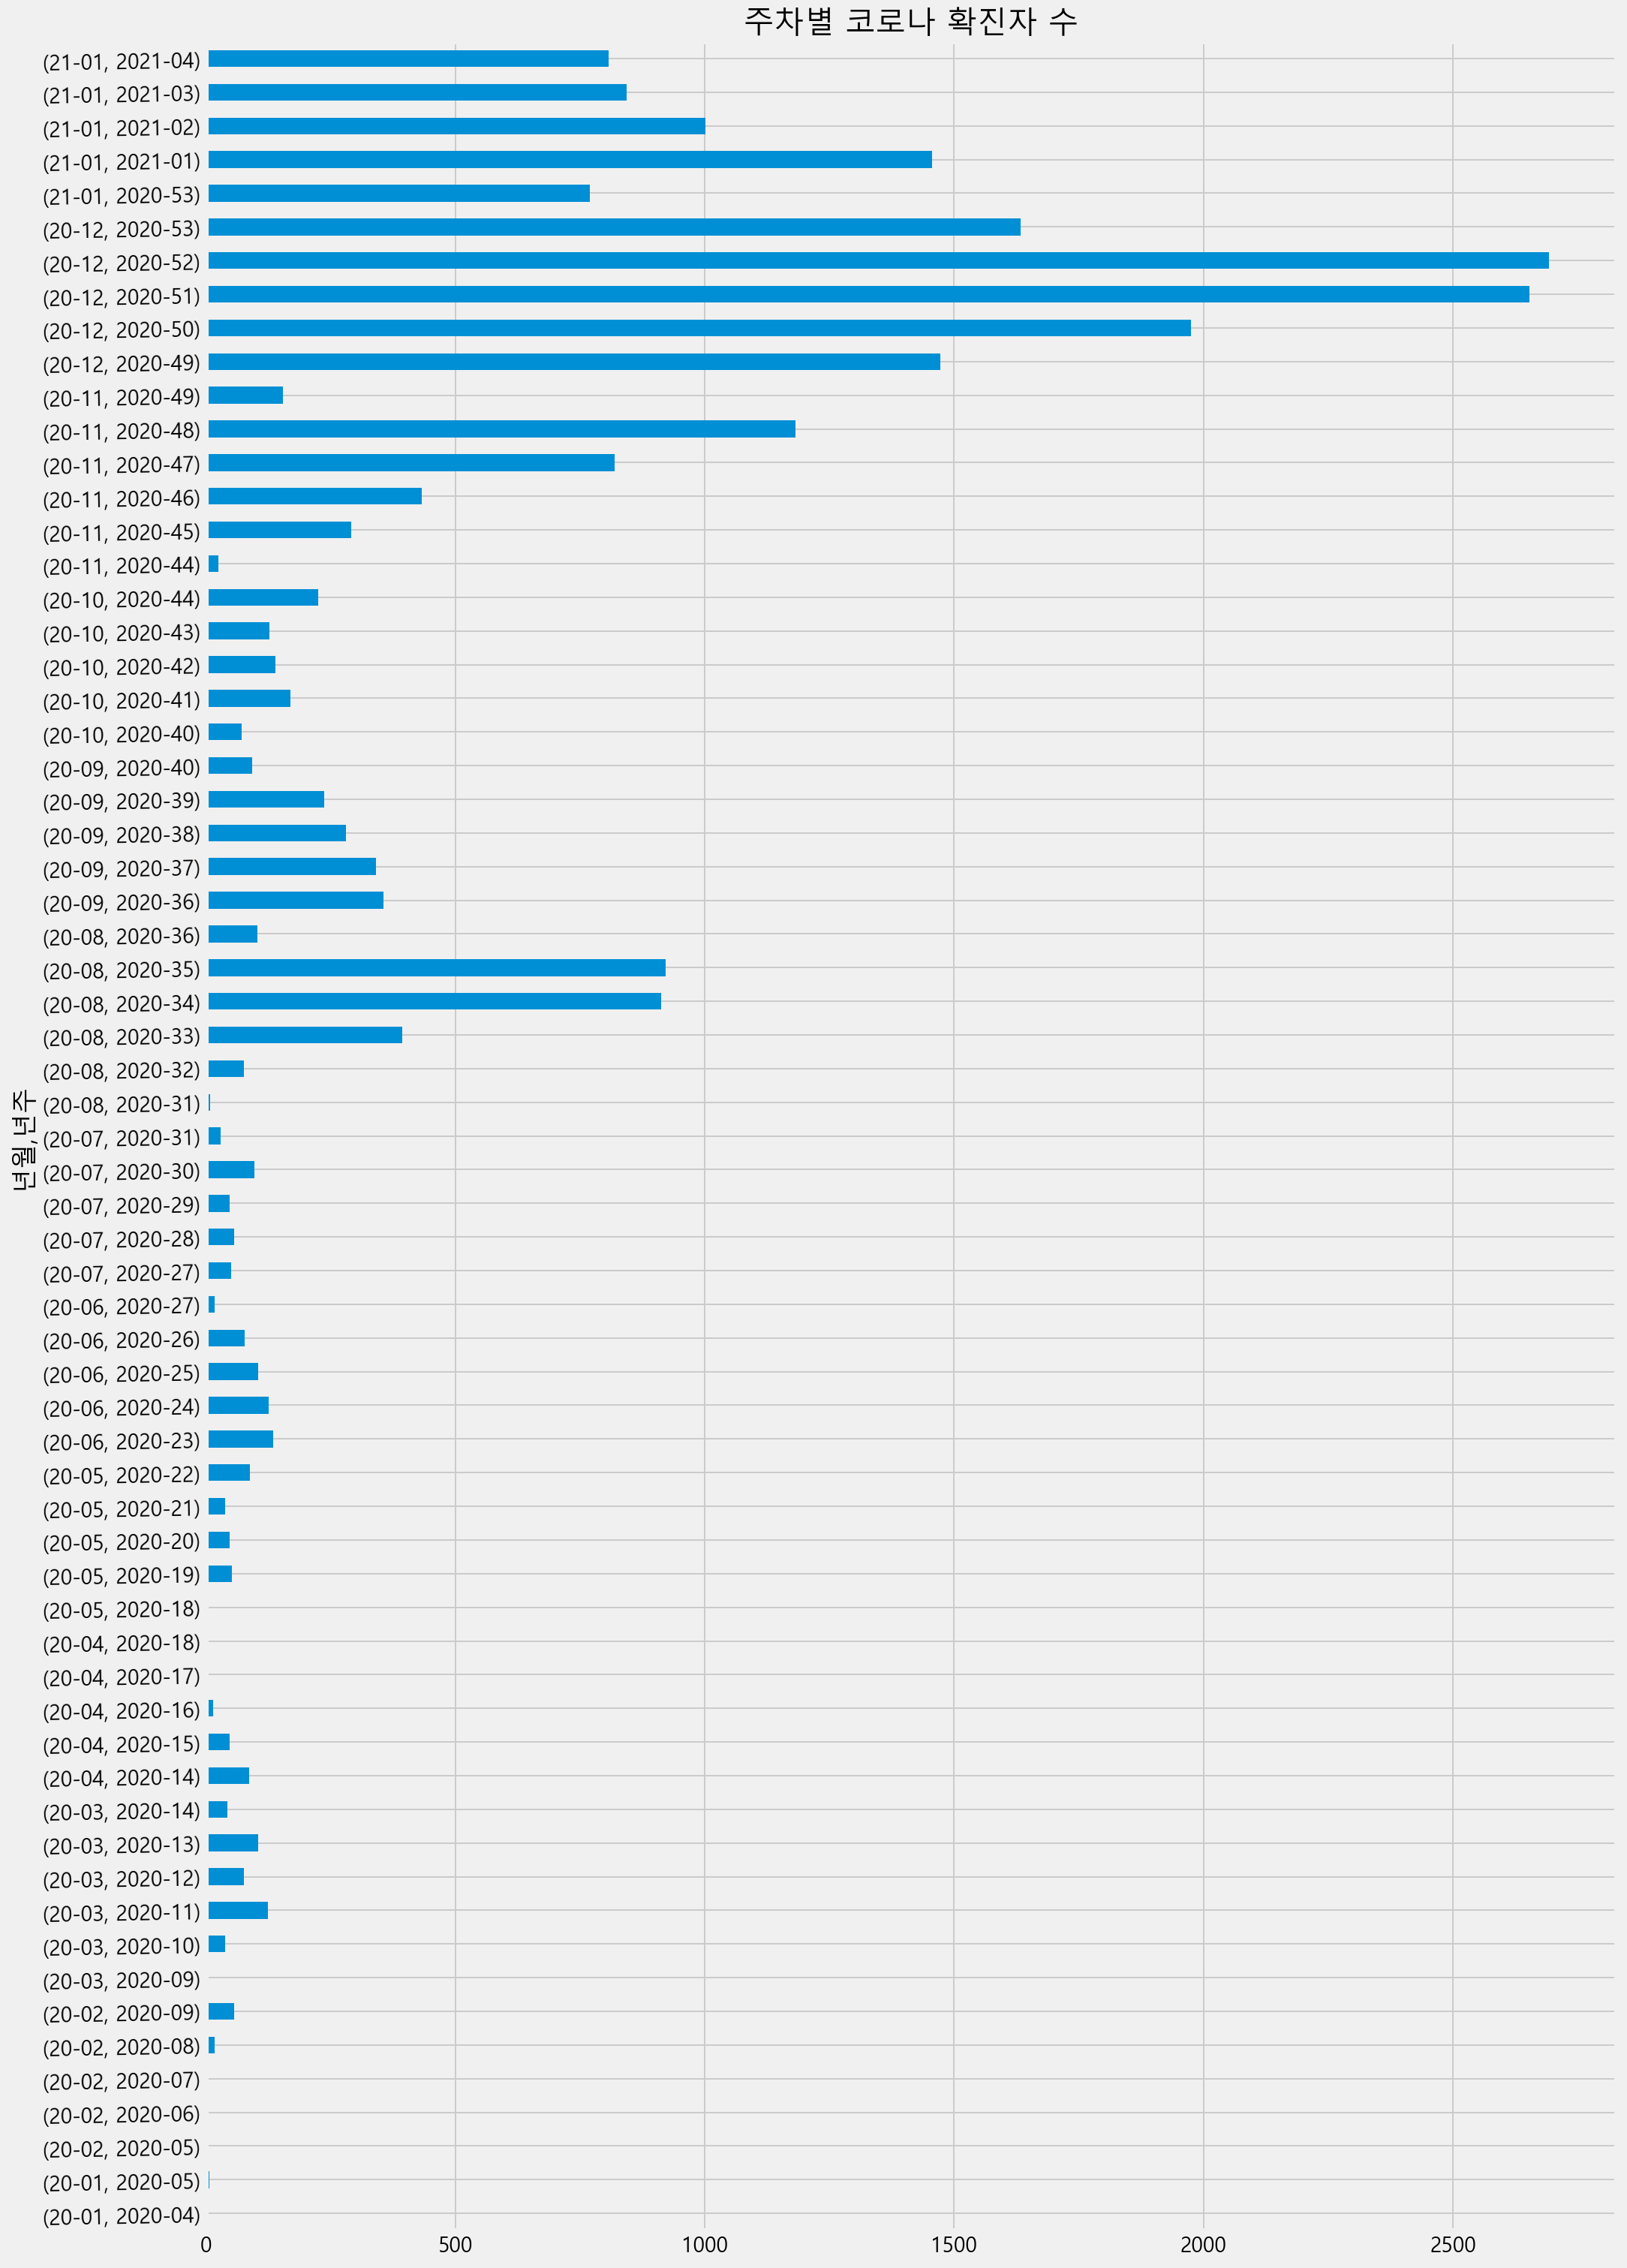

In [14]:
week_count_g = week_count.plot.barh(figsize=(15,25),rot=1,title="주차별 코로나 확진자 수")

In [15]:
df

,연번,환자,확진일,거주지,여행력,접촉력,조치상황,년월,년월일,월,주,년주
0,24267,78369,2021-01-31,타시도,-,감염경로 조사중,치료중,21-01,21-01-31,1,4,2021-04
1,24266,78472,2021-01-31,강남구,-,감염경로 조사중,치료중,21-01,21-01-31,1,4,2021-04
2,24265,78484,2021-01-31,강남구,-,성동구 소재 병원 관련('21.1월),치료중,21-01,21-01-31,1,4,2021-04
3,24264,78471,2021-01-31,강남구,-,성동구 소재 병원 관련('21.1월),치료중,21-01,21-01-31,1,4,2021-04
4,24263,78415,2021-01-31,타시도,-,타시도 확진자 접촉,치료중,21-01,21-01-31,1,4,2021-04
...,...,...,...,...,...,...,...,...,...,...,...,...
24262,5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,20-01,20-01-31,1,5,2020-05
24263,4,7,2020-01-30,마포구,중국,해외유입,퇴원,20-01,20-01-30,1,5,2020-05
24264,3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,20-01,20-01-30,1,5,2020-05
24265,2,5,2020-01-30,중랑구,중국,해외유입,퇴원,20-01,20-01-30,1,5,2020-05


In [16]:
df["확진일"] = pd.to_datetime(df["확진일"])

In [17]:
df["확진요일"] = df["확진일"].dt.dayofweek
df["확진요일"]

0        6
1        6
2        6
3        6
4        6
        ..
24262    4
24263    3
24264    3
24265    3
24266    4
Name: 확진요일, Length: 24267, dtype: int64

In [25]:
df_week_day = df.groupby(["년주", "확진요일"])["연번"].count()
df_week_day = df_week_day.unstack()
df_week_day = df_week_day.fillna(0).astype(int)
df_week_day

확진요일,0,1,2,3,4,5,6
년주,,,,,,,
2020-04,0,0,0,0,1,0,0
2020-05,0,0,0,3,3,0,1
2020-06,0,0,2,2,0,0,0
2020-07,0,0,0,0,0,0,2
2020-08,0,0,2,5,2,5,3
2020-09,4,16,10,9,12,5,5
2020-10,6,0,7,1,7,7,10
2020-11,26,46,17,12,9,8,6
2020-12,11,6,11,17,17,8,6


In [19]:
df_week_day.columns

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='확진요일')

In [20]:
dayofweek = "월 화 수 목 금 토 일"
dayofweek = dayofweek.split()
dayofweek

['월', '화', '수', '목', '금', '토', '일']

In [21]:
df_week_day.columns = dayofweek

In [26]:
week = df_week_day.sum(axis=1)
week

년주
2020-04       1
2020-05       7
2020-06       4
2020-07       2
2020-08      17
2020-09      61
2020-10      38
2020-11     124
2020-12      76
2020-13     105
2020-14     129
2020-15      47
2020-16      15
2020-17       3
2020-18       8
2020-19      52
2020-20      47
2020-21      39
2020-22      88
2020-23     134
2020-24     125
2020-25     105
2020-26      78
2020-27      67
2020-28      57
2020-29      48
2020-30      97
2020-31      38
2020-32      76
2020-33     394
2020-34     912
2020-35     921
2020-36     459
2020-37     341
2020-38     280
2020-39     237
2020-40     164
2020-41     170
2020-42     139
2020-43     127
2020-44     250
2020-45     291
2020-46     432
2020-47     820
2020-48    1182
2020-49    1627
2020-50    1975
2020-51    2654
2020-52    2693
2020-53    2402
2021-01    1456
2021-02    1002
2021-03     844
2021-04     807
dtype: int64

In [27]:
week = df_week_day.sum(axis=1)
df_week_day["주당 확진자 수"] = week

In [28]:
week_avg = (df_week_day["주당 확진자 수"]/7).astype(int)
df_week_day["주당 평균 확진자 수"] = week_avg 
df_week_day.style.background_gradient(cmap="Blues")

확진요일,0,1,2,3,4,5,6,주당 확진자 수,주당 평균 확진자 수
년주,,,,,,,,,
2020-04,0,0,0,0,1,0,0,1,0
2020-05,0,0,0,3,3,0,1,7,1
2020-06,0,0,2,2,0,0,0,4,0
2020-07,0,0,0,0,0,0,2,2,0
2020-08,0,0,2,5,2,5,3,17,2
2020-09,4,16,10,9,12,5,5,61,8
2020-10,6,0,7,1,7,7,10,38,5
2020-11,26,46,17,12,9,8,6,124,17
2020-12,11,6,11,17,17,8,6,76,10
